### Theory
Regression: It is the prediction of a dependent variable given some independent variable.

Example: Given features such as location, experience, cost of living, level of education and role predicting the salaries of employees fall under the category of Regression.

It should be noted that before applying any machine learning algorithm, a process called feature selection is done so there exist some form of relationship between the selected features which needs to be found as well as to reduce the number of features on which the model has to be trained on thus reducing complexity and training time.

Linear Regression:
It falls under supervised learning where training data along with the correct predicted values are required to train the model.

In this method we assume that the dependent variable y has a linear relationship with the independent variable x = {x1, x2, …., xn} weighted with w= {w0, w1, w2, …, wn} in form below.

                                        y = w0 + w1*x1 + w2*x2+ ……. + wn*xn

The weights are called as the regression coefficients which are determined by the machine learning algorithm. w0 is considered as the bias which essentially provides an offset.


### Working of Algorithm:

Since single variable linear regression is being implemented the relationship is assumed as follows

                                        y = w0 + w1*x1

when the dependent variable y depends only on the independent variable x1.

The algorithm initializes weights w0 and w1 to some random value and calculates the predicted value (yp) which is then used to find the find the error. The Sum of Squared Residuals (SSR) is used so that the error generated is always positive. 

The SSR error/ cost is given as follows:

                                        cost = sum (0.5*(w0 + w1*x1 - y)^2)

The constant 0.5 is taken to ease calculations when the derivative of the error is taken.

The error e with respect to w0 and w1 is given by the partial derivative of e with respect to w0 and w1.

                                        d_w0 = sum (w0 + x1*w_1 - y)
                                        d_w1 = sum (x1 * (w0 + x1*w1 - y) )

Weights w0 and w1 are then updates as follows

                                        w0’ = w0 – alpha * d_w0
                                        w1’= w1 – alpha * d_w1
                                
here w0'and w1'are the new weights and alpha is the learning rate. this method of finding the error and then updating the weights is called as gradient descent and is useful when there are lot of data points.

This is done in an iterative manner until the SSR error obtained is sufficiently low.

Once optimum values of w0 and w1 are obtained new values of data can be used for prediction.

## Python implementation

In [19]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

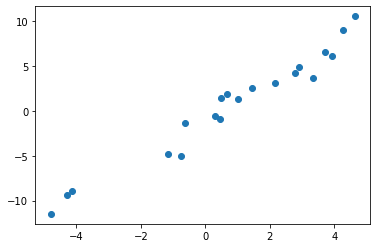

In [20]:
# Set the random seed so the program will always generate the same data
np.random.seed(0)

# Generate n random x values between -5 and 5
n = 20
x1 = 10 * np.random.rand(n) - 5

# Generate y values from the model y ~= 2x - 1 and random noise epsilon
epsilon = np.random.randn(n)  
y = -1 + 2*x1 + epsilon
plt.plot(x1, y, marker='o', linestyle='none')
plt.show()

In [21]:
def cost_function(x,y,w0,w1):
    #  x vector of length m containing x values
    #  y vector of length m containing y values
    #  w0 (scalar) intercept parameter
    #  w1 (scalar) slope parameter
    cost = sum(0.5*( (w0 + w1*x) - y)**2)
    return cost

def gradient(x, y, w0, w1):
    #Compute the partial derivative of the squared error cost function
    
    #Inputs:
    #  x vector of length m containing x values
    #  y vector of length m containing y values
    #  w0 (scalar) intercept parameter
    #  w1 (scalar) slope parameter

    d_w0 = 0.0
    d_w1 = 0.0
 
    d_w0 = sum(w0 + x*w1 - y)
    d_w1 = sum((w0 + x*w1 - y)*x)

 
    return d_w0, d_w1 # return is a tuple

In [22]:
iters = 200 # change as needed
# TODO: intialize theta_0, theta_1, and step size
w0 = 1
w1 = 0.5
w0_plot = []
w1_plot =[]
alpha = 0.01
iters = 100
for i in range(0, iters):
    
    w0_plot.append(w0)
    w1_plot.append(w1)
    
    w_d = gradient(x1,y,w0,w1)
    
    w0 = w0 - alpha*w_d[0]
    w1 = w1 - alpha*w_d[1]

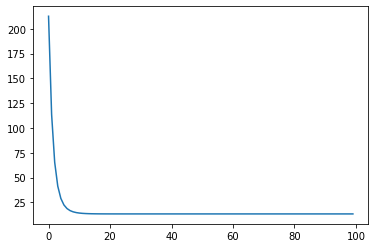

In [23]:
cost_plot = []
for i in range(0,iters):
    cost_plot.append(cost_function(x1,y,w0_plot[i],w1_plot[i]))
plt.plot(range(iters),cost_plot)
y_p = w0 + w1*x1

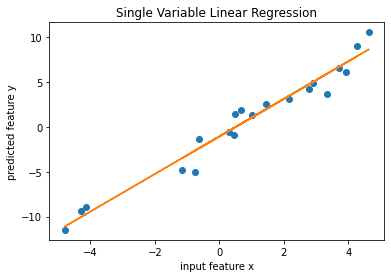

In [24]:
plt.xlabel("input feature x")
plt.ylabel("predicted feature y")
plt.title("Single Variable Linear Regression")
plt.plot(x1, y, marker='o', linestyle='none')
plt.plot(x1,y_p)
plt.show()